## Gradient Descent and its Variations

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [11]:
# Globals
ORANGE = '#F2BE4A'
RED = '#ef4123'
GRAY = '#545453'

### Prepare Data

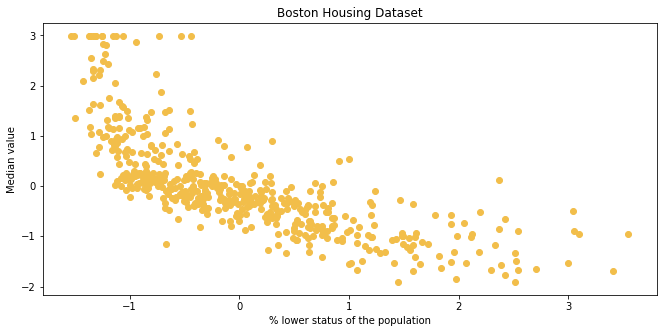

In [8]:
data = pd.read_csv('./data/boston_housing.csv')
data = data.dropna()

scaler = StandardScaler()

X = data['lstat'].values
X = X.reshape(-1, 1)
X = scaler.fit_transform(X)

y = data['medv'].values
y = y.reshape(-1, 1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.figure(figsize=(11, 5))

plt.title("Boston Housing Dataset")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X, y = y, color=ORANGE)
plt.show()

In [16]:
def print_evaluation_metrics(actual_values, predictions):
    print (f'MAE: {metrics.mean_absolute_error(actual_values, predictions)}')
    print (f'MSE: {metrics.mean_squared_error(actual_values, predictions)}')
    print(f'RMSE: {sqrt(metrics.mean_squared_error(actual_values, predictions))}')
    print (f'R Squared: {metrics.r2_score(actual_values, predictions)}')

### Gradient Descent

In [9]:
class MyGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            for i in range(N):
                Xi = X[i, :]
                yi = y[i, :]
                
                f = yi - (self.w * Xi + self.b)
                                
                self.w -= self.learning_rate * (-2 * Xi.dot(f.T).sum() / N)
                self.b -= self.learning_rate * (-2 * f.sum() / N)

            loss = mean_squared_error(y, (self.w * X + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [10]:
model = MyGradientDescent(learning_rate = 0.01)
history = model.fit(X_train, y_train, 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.0129236386713547)
Epoch: 100, Loss: 0.4836365268936342)
Epoch: 200, Loss: 0.4717052013642623)
Epoch: 300, Loss: 0.4714309129514397)
Epoch: 400, Loss: 0.4714244612434121)
Epoch: 500, Loss: 0.47142429776534295)
Epoch: 600, Loss: 0.4714242918194498)
Epoch: 700, Loss: 0.4714242913200272)
Epoch: 800, Loss: 0.47142429124768254)
Epoch: 900, Loss: 0.47142429123592733)


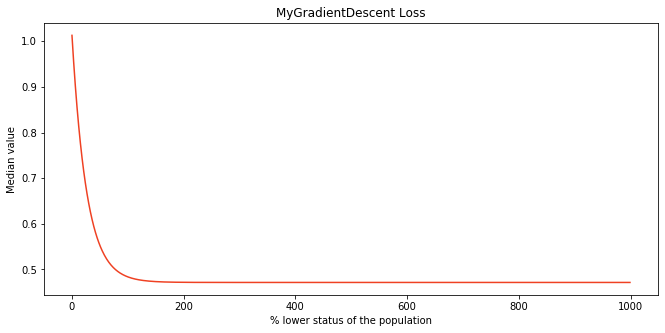

In [12]:
plt.figure(figsize=(11, 5))

plt.title("MyGradientDescent Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(history, color=RED)

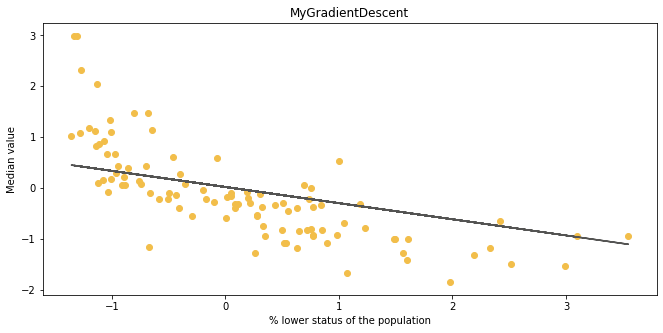

In [30]:
plt.figure(figsize=(11, 5))

plt.title("MyGradientDescent")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X_test, y = y_test, color=ORANGE)
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color=GRAY)

plt.show()

In [21]:
print_evaluation_metrics(y_test, predictions)

MAE: 0.473454277143194
MSE: 0.39941915778144144
RMSE: 0.6319961691192767
R Squared: 0.5292938059200472


In [22]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Predictions': predictions.flatten()
})

,Actual Value,Predictions
0,-0.221246,-0.564486
1,-1.842924,-1.518349
2,-0.993992,-1.142846
3,-1.081062,-0.403710
4,-0.145059,0.339743
...,...,...
97,0.268523,0.311688
98,-0.330083,-0.643255
99,-0.286548,-0.387525
100,-0.776317,-0.944305


### Batch Gradient Descent

In [23]:
class MyBatchGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            f = y - (self.w * X + self.b)
    
            self.w -= self.learning_rate * (-2 * X.dot(f.T).sum() / N)
            self.b -= self.learning_rate * (-2 * f.sum() / N)
        
            loss = mean_squared_error(y, (self.w * X + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [24]:
model = MyBatchGradientDescent(learning_rate = 0.01)
history = model.fit(X_train, y_train, 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.0196646159305187)
Epoch: 100, Loss: 0.6771864255196849)
Epoch: 200, Loss: 0.6660374373514026)
Epoch: 300, Loss: 0.6655591433109558)
Epoch: 400, Loss: 0.6655383319190815)
Epoch: 500, Loss: 0.6655374258171037)
Epoch: 600, Loss: 0.6655373863654891)
Epoch: 700, Loss: 0.6655373846477667)
Epoch: 800, Loss: 0.6655373845729767)
Epoch: 900, Loss: 0.6655373845697203)


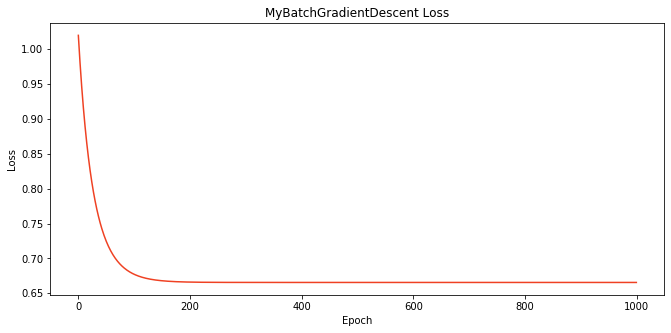

In [26]:
plt.figure(figsize=(11, 5))

plt.title("MyBatchGradientDescent Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(history, color=RED)

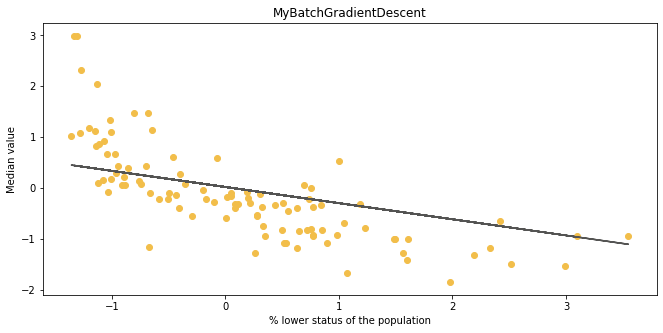

In [27]:
plt.figure(figsize=(11, 5))

plt.title("MyBatchGradientDescent")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X_test, y = y_test, color=ORANGE)
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color=GRAY)

plt.show()

In [31]:
print_evaluation_metrics(y_test, predictions)

MAE: 0.5335446826075985
MSE: 0.5048982922031701
RMSE: 0.71056195521796
R Squared: 0.4049890975673559


In [32]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Predictions': predictions.flatten()
})

,Actual Value,Predictions
0,-0.221246,-0.213164
1,-1.842924,-0.606138
2,-0.993992,-0.451438
3,-1.081062,-0.146928
4,-0.145059,0.159361
...,...,...
97,0.268523,0.147803
98,-0.330083,-0.245616
99,-0.286548,-0.140260
100,-0.776317,-0.369643


### Stochastic Gradient Descent

#### Python Implementation

In [33]:
class MySGD():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
    
    def _get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes,:]
    
    def fit(self, X, y, batch_size = 32, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(X, y, batch_size)
            
            f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (-2 * X_batch.dot(f.T).sum() / N)
            self.b -= self.learning_rate * (-2 * f.sum() / N)
        
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [34]:
model = MySGD(learning_rate = 0.01)
history = model.fit(X_train, y_train, batch_size = 64, epochs = 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 0.9914110766698432)
Epoch: 100, Loss: 0.6768579622217816)
Epoch: 200, Loss: 0.8013442524355419)
Epoch: 300, Loss: 0.9576474623141815)
Epoch: 400, Loss: 0.5098436384796313)
Epoch: 500, Loss: 0.4999927446437867)
Epoch: 600, Loss: 0.3884074086779348)
Epoch: 700, Loss: 0.5652719285417718)
Epoch: 800, Loss: 0.6760513744917662)
Epoch: 900, Loss: 0.5867612449622412)


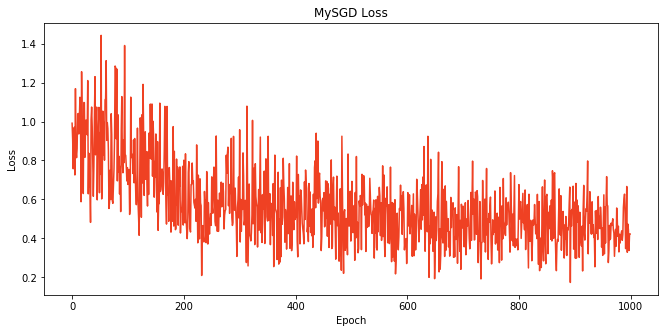

In [35]:
plt.figure(figsize=(11, 5))

plt.title("MySGD Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(history, color=RED)

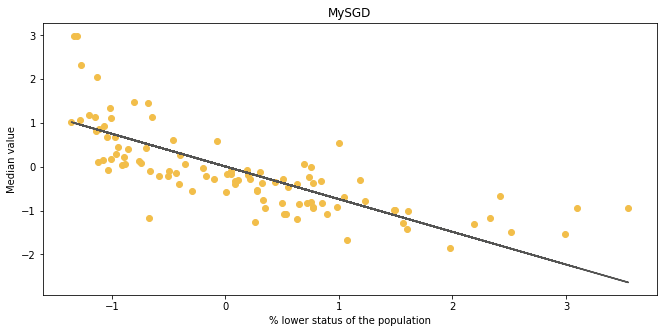

In [36]:
plt.figure(figsize=(11, 5))

plt.title("MySGD")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X_test, y = y_test, color=ORANGE)
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color=GRAY)

plt.show()

In [37]:
print_evaluation_metrics(y_test, predictions)

MAE: 0.469575005370988
MSE: 0.3927188687871736
RMSE: 0.6266728562712555
R Squared: 0.5371899407705776


In [38]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Predictions': predictions.flatten()
})

,Actual Value,Predictions
0,-0.221246,-0.542969
1,-1.842924,-1.467229
2,-0.993992,-1.103380
3,-1.081062,-0.387183
4,-0.145059,0.333196
...,...,...
97,0.268523,0.306012
98,-0.330083,-0.619294
99,-0.286548,-0.371500
100,-0.776317,-0.911000


#### Using Sci-Kit Learn

In [41]:
sgd_model = SGDRegressor(max_iter=10000, alpha=0.1)
sgd_model.fit(X_train, y_train)

sgd_predictions = sgd_model.predict(X_test)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


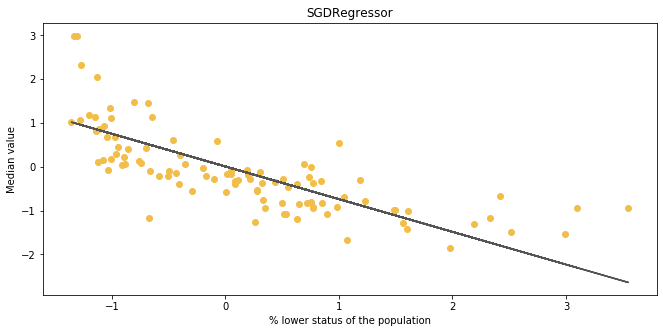

In [42]:
plt.figure(figsize=(11, 5))

plt.title("SGDRegressor")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value')

plt.scatter(x = X_test, y = y_test, color=ORANGE)
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color=GRAY)

plt.show()

In [44]:
print_evaluation_metrics(y_test, predictions)

MAE: 0.469575005370988
MSE: 0.3927188687871736
RMSE: 0.6266728562712555
R Squared: 0.5371899407705776


In [43]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'SGD Model Prediction': sgd_predictions,
})

,Actual Value,SGD Model Prediction
0,-0.221246,-0.504290
1,-1.842924,-1.362508
2,-0.993992,-1.024658
3,-1.081062,-0.359636
4,-0.145059,0.309269
...,...,...
97,0.268523,0.284028
98,-0.330083,-0.575161
99,-0.286548,-0.345073
100,-0.776317,-0.846024
